In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist["data"]

pandas.core.frame.DataFrame

In [4]:
mnist["target"]

pandas.core.series.Series

In [14]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
X = np.array(X)

In [31]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

In [35]:
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

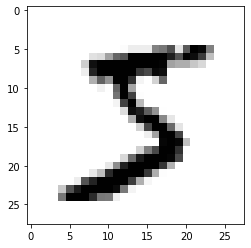

In [37]:
plt.imshow(some_digit_image, "binary")
plt.show()

In [38]:
import numpy as np
y = y.astype(np.uint8)

In [40]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

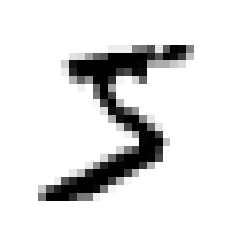

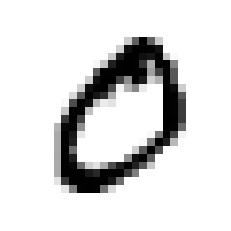

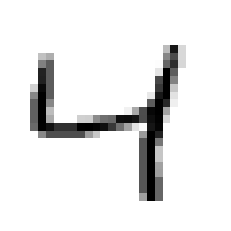

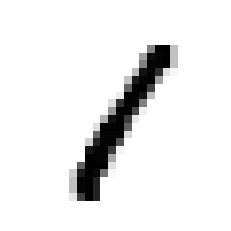

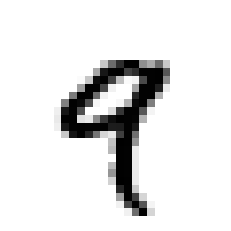

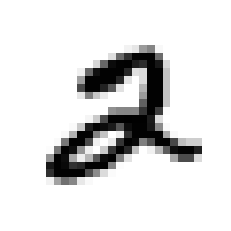

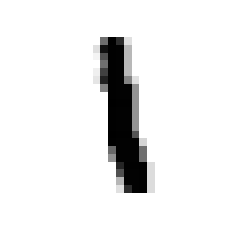

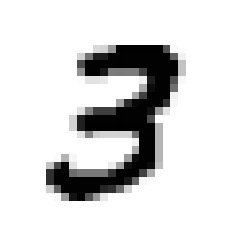

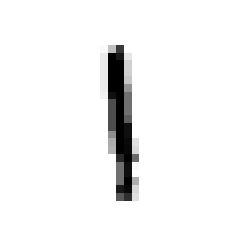

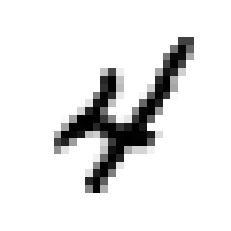

In [47]:
for i in X[:10]:
    plt.imshow(i.reshape(28,28), "binary")
    plt.axis("off")
    plt.show()

In [48]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [49]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [51]:
from sklearn.linear_model import SGDClassifier
sgd_cl = SGDClassifier(random_state=42)
model_5 = sgd_cl.fit(x_train, y_train_5)

In [52]:
sgd_cl.predict([some_digit])

array([ True])

In [53]:
predictions = sgd_cl.predict(x_train)

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_cl, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [58]:
np.zeros((10, 1),dtype=bool)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [67]:
class NeverFiveCls():
    def fit(self, X):
        return X
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [68]:
n = NeverFiveCls()


In [61]:
def accuracy(y_true, y_predict):
    n_correct = sum( y_true == y_predict)
    return n_correct / len(y_true)

In [69]:
accuracy(y_train_5, n.predict(x_train))

0.90965

# For more control in the output
You may want to have more control over cross_val_score() results compared to what Sklearn provides. In that case, we'll create our own function for calculating accuracy.

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
def accuracy_Kfold(x_train, y_train):
    skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracy=[]
    print("SKF: ", skfolds.split(x_train, y_train_5))
    for train_index, test_index in skfolds.split(x_train, y_train_5):
        clone_clf = clone(sgd_clf)
        
        x_train_folds = x_train[train_index]
        y_train_folds = y_train[train_index]
        
        x_test_folds = x_train[test_index]
        y_test_folds = y_train[test_index]
        
        clone_model = clone.fit(x_train_folds, y_train_folds)
        y_predict = clone_model.predict(x_test_folds)
        
        correct = sum (y_predict == y_test_folds)
        accuracy.append(correct / len(x_train))
    return accuracy